In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification,make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import optuna
from optuna.samplers import GridSampler,RandomSampler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,classification_report,log_loss,roc_auc_score

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# data = pd.read_csv(r"C:\Users\saisn\Downloads\heart.csv")
data = pd.read_csv("heart.csv")

### Inspecting Data

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [366]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [367]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
#check the null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#check For The Duplicates
data.duplicated().sum()

0

No duplicate rows were found in the dataset.

In [6]:
# Getting the statistical summary of the data
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Univariate Analysis

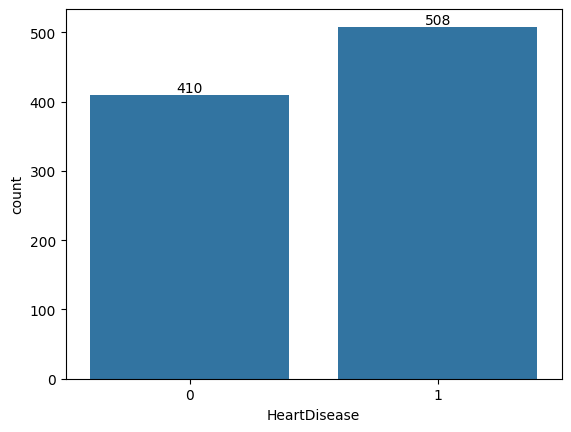

In [373]:
ax = sns.countplot(x=data['HeartDisease'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show();

1 (Heart Disease present) → 508 samples (≈ 55%)

0 (No Heart Disease) → 410 samples (≈ 45%)

This is mild imbalance, not severe.

A perfectly balanced dataset is 50/50.

Common threshold for serious imbalance is when one class is < 30% of the data — yours is 45%, which is acceptable but not ideal if false negatives are critical.



<Axes: xlabel='Age', ylabel='Density'>

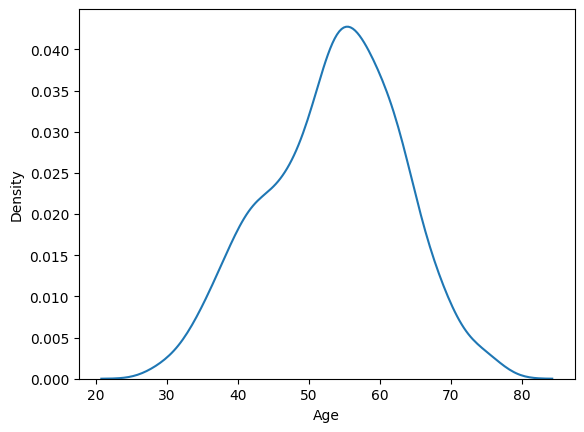

In [376]:
sns.kdeplot(x=data['Age'])

In [14]:
num_cols = data.select_dtypes(include="number").columns
num_cols.shape

(7,)

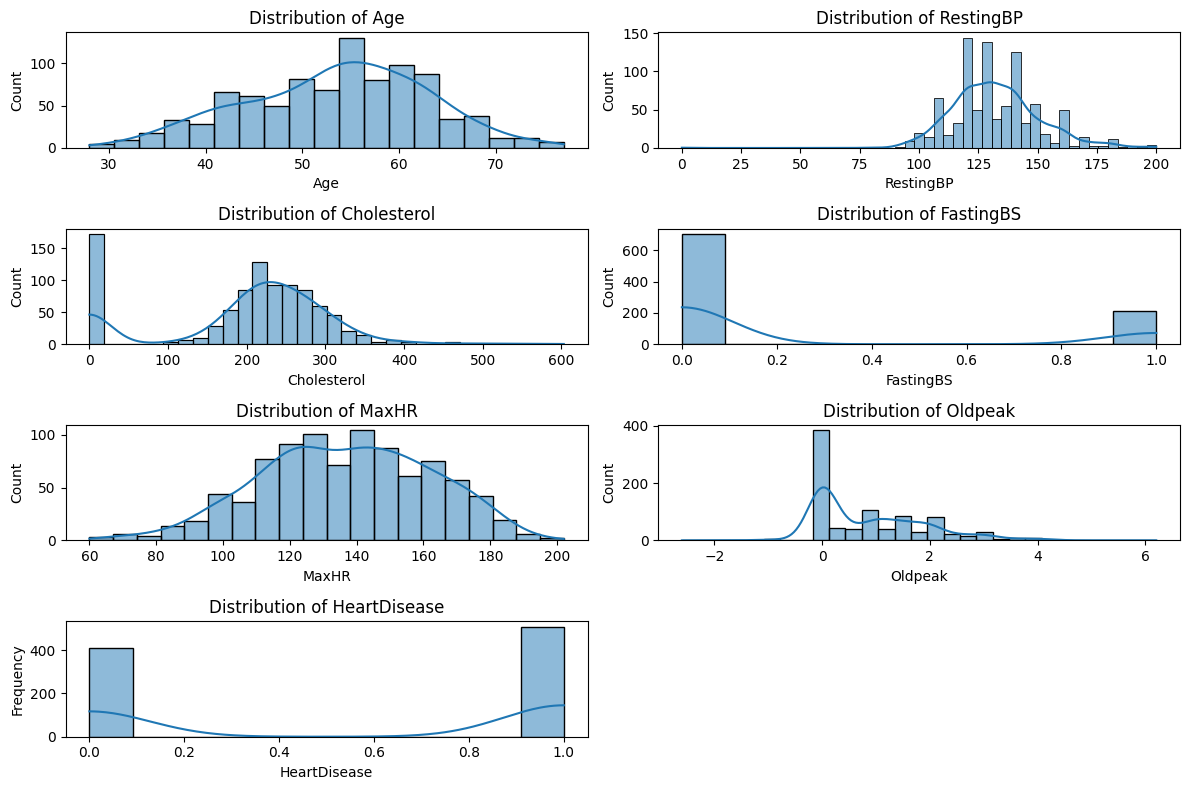

In [15]:
# Univariate analysis of numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show();

In [17]:
cat_cols = data.select_dtypes(include="object").columns
cat_cols.shape

(5,)

In [ ]:
# Univariate Analysis for Categorical Columns

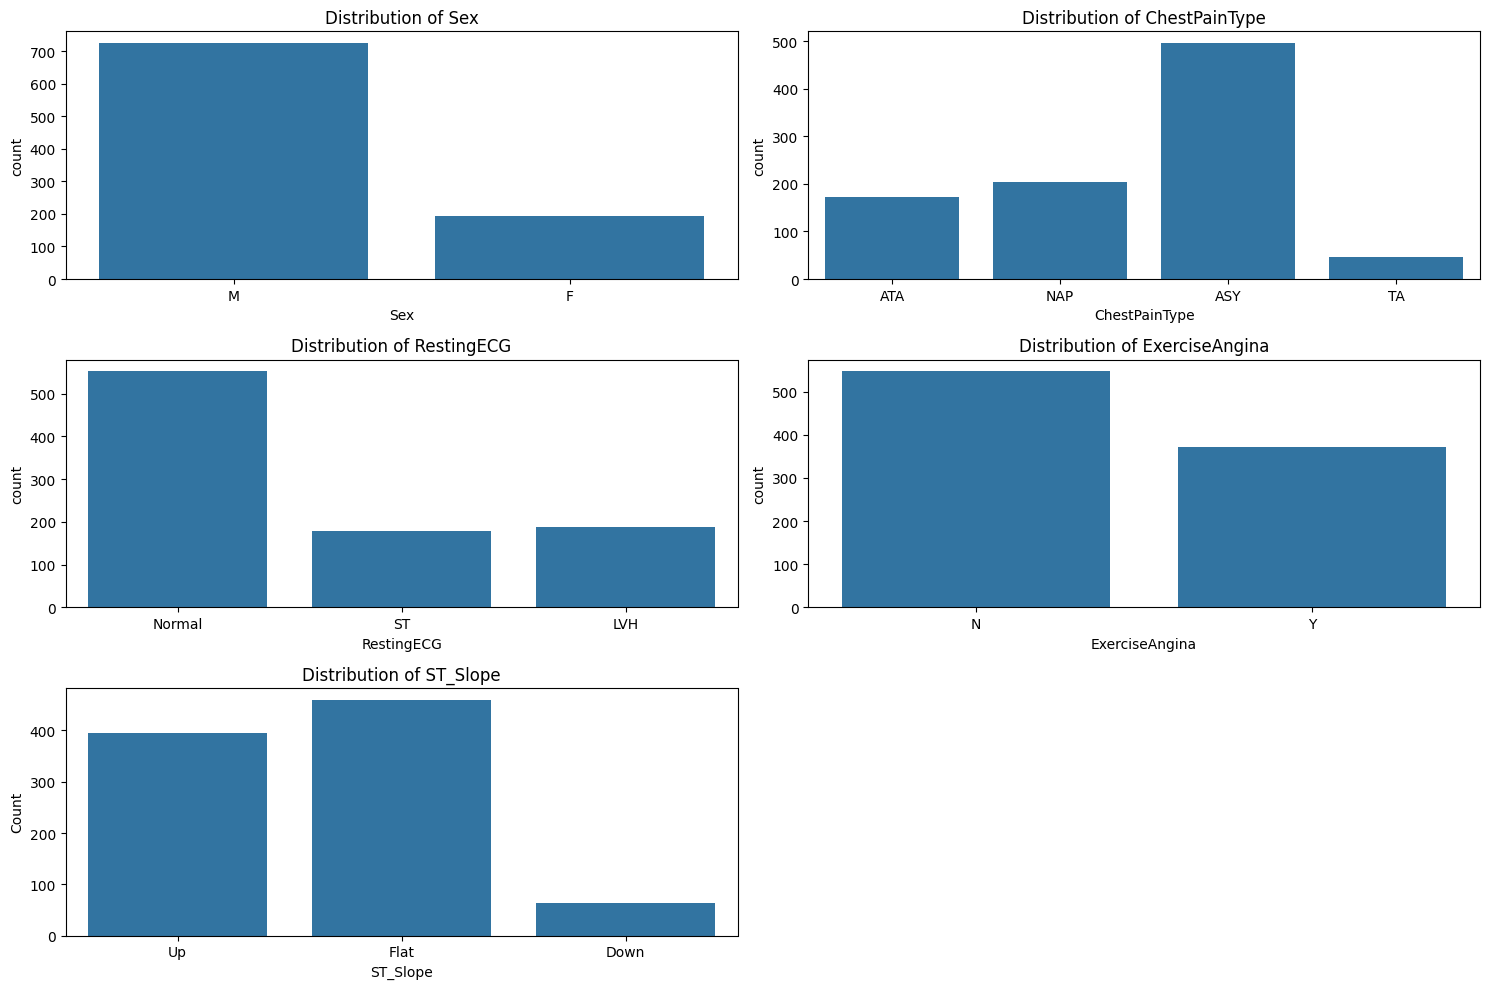

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols,1):
    plt.subplot(3, 2, i)
    sns.countplot(x=data[col])
    plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.tight_layout()
plt.show();

### Observations:
- `Age` and `MaxHR` are very close to a normal distribution.
- `Cholestrol` and `RestingBP` are skewed which need to be handled.
- `FastingBS`,`HeartDisease` and `OldPeak` are heavily skewed and imbalanced.
- All the categorical columns are imbalanced.

### Bivariate Analysis

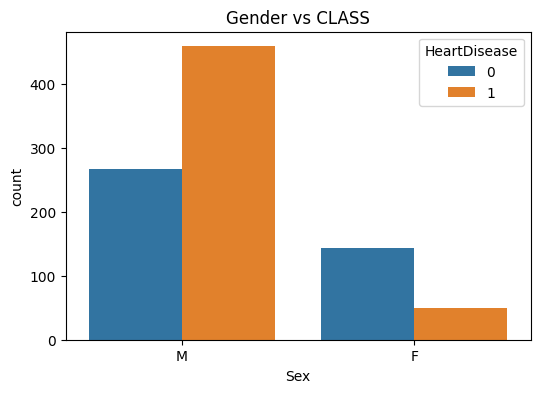

In [380]:
#Bivariate Analysis

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Gender vs CLASS')
plt.show();

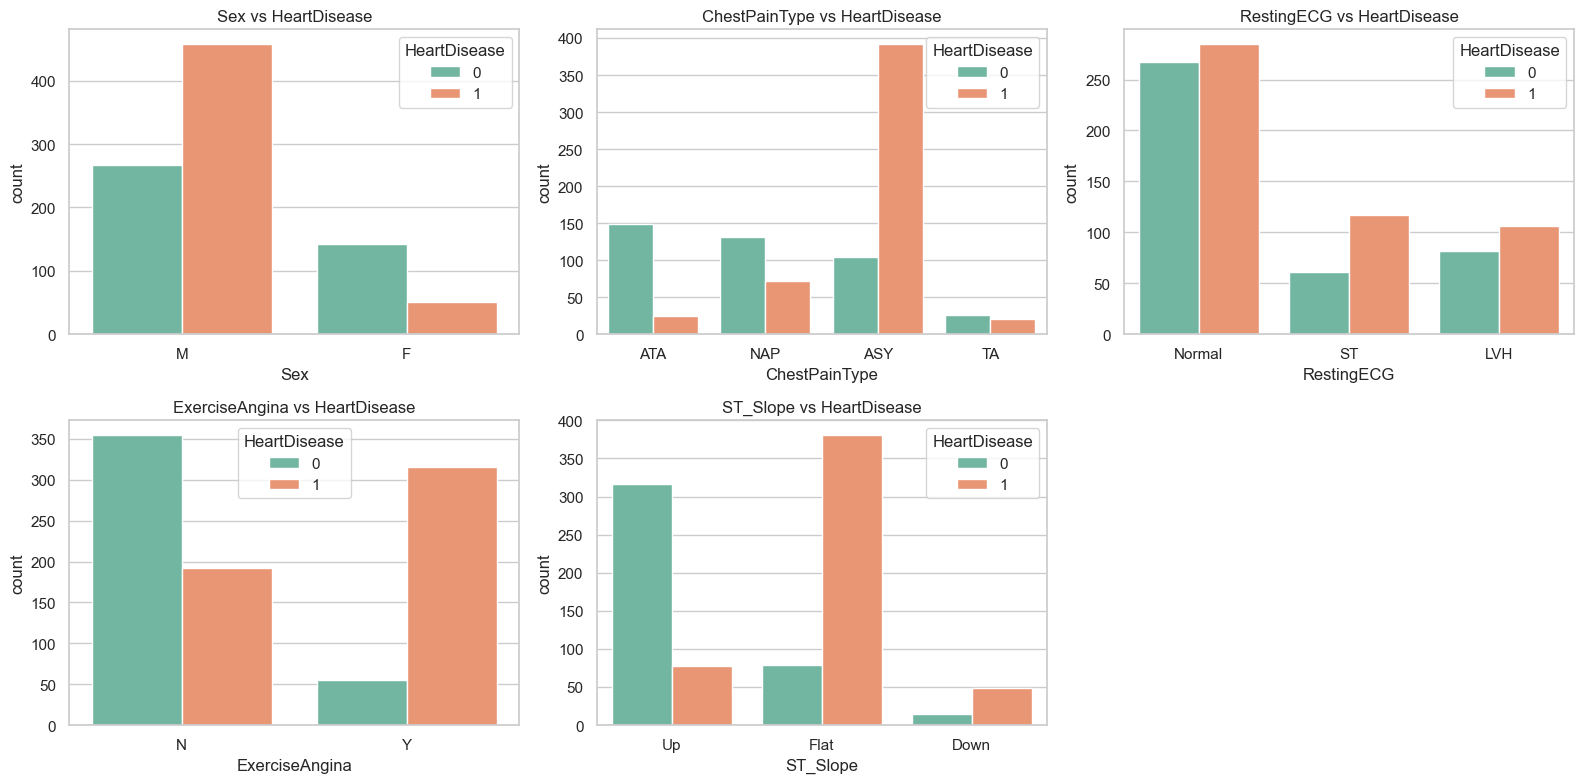

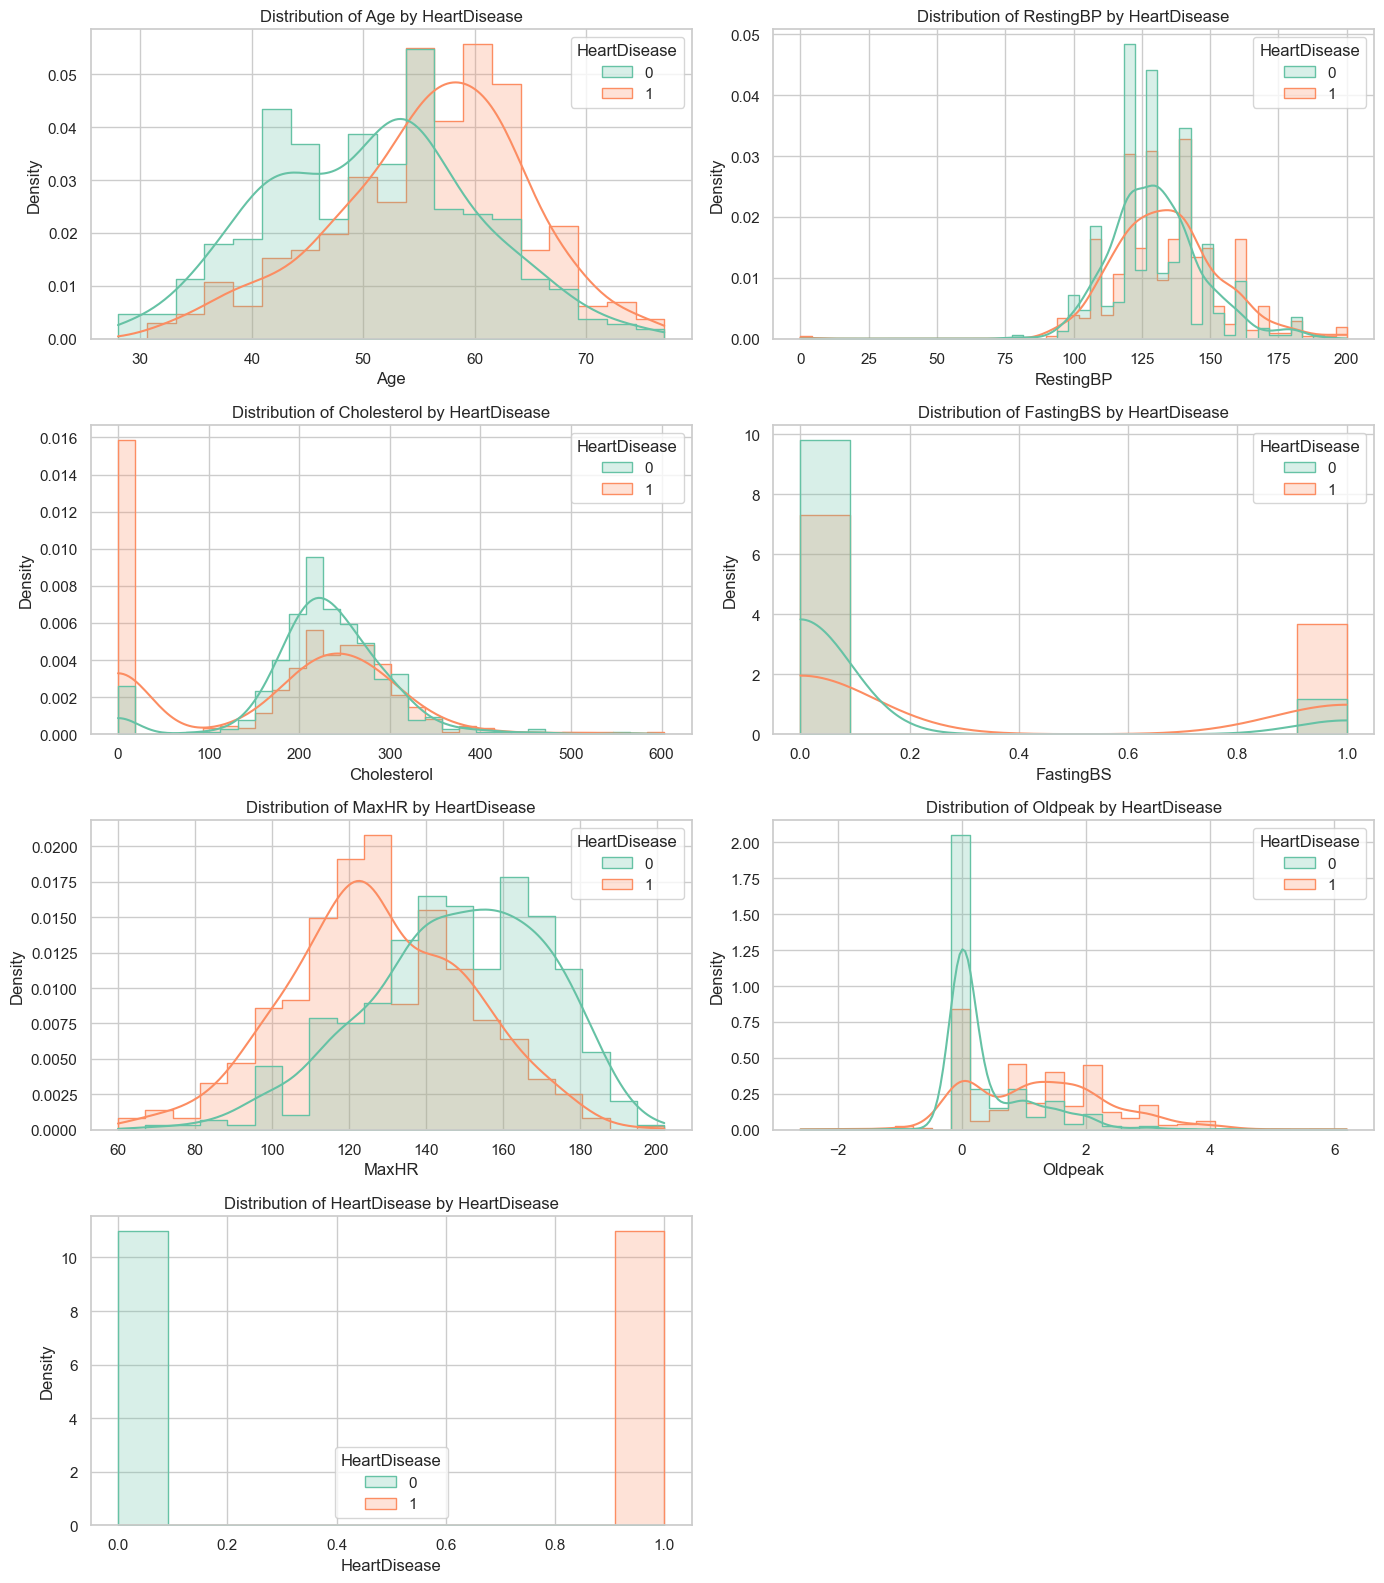

In [37]:
# categorical_cols = cat_cols
# numerical_cols = num_cols


# sns.set(style="whitegrid", palette="Set2")


# # 1. Categorical vs HeartDisease
# for col in categorical_cols:
#     plt.figure(figsize=(6,4))
#     sns.countplot(data=data, x=col, hue="HeartDisease")
#     plt.title(f"{col} vs HeartDisease")
#     plt.legend(title="HeartDisease", loc="upper right")
#     plt.show();

# # 2. Numerical vs HeartDisease

# for col in numerical_cols:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(data=data, x="HeartDisease", y=col)
#     plt.title(f"{col} vs HeartDisease")
#     plt.show();

#     plt.figure(figsize=(6,4))
#     sns.histplot(data=data, x=col, hue="HeartDisease", kde=True, element="step", stat="density", common_norm=False)
#     plt.title(f"Distribution of {col} by HeartDisease")
#     plt.show();


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

# -------------------------------
# 1. Categorical vs HeartDisease
# -------------------------------
n_cat = len(categorical_cols)
fig, axes = plt.subplots(nrows=(n_cat+2)//3, ncols=3, figsize=(16, 4*((n_cat+2)//3)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, hue="HeartDisease", ax=axes[i])
    axes[i].set_title(f"{col} vs HeartDisease")
    axes[i].legend(title="HeartDisease")

# Remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout();
plt.show();


# # -------------------------------
# # 2a. Numerical vs HeartDisease (Boxplots)
# # -------------------------------
# n_num = len(numerical_cols)
# fig, axes = plt.subplots(nrows=(n_num+1)//2, ncols=2, figsize=(14, 4*((n_num+1)//2)))
# axes = axes.flatten()

# for i, col in enumerate(numerical_cols):
#     sns.boxplot(data=data, x="HeartDisease", y=col, ax=axes[i])
#     axes[i].set_title(f"{col} vs HeartDisease")

# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()



# 2. Numerical vs HeartDisease (Histograms)
n_num = len(numerical_cols)

fig, axes = plt.subplots(nrows=(n_num+1)//2, ncols=2, figsize=(14, 4*((n_num+1)//2)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, hue="HeartDisease", kde=True, element="step", 
                 stat="density", common_norm=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by HeartDisease")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout();
plt.show();


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

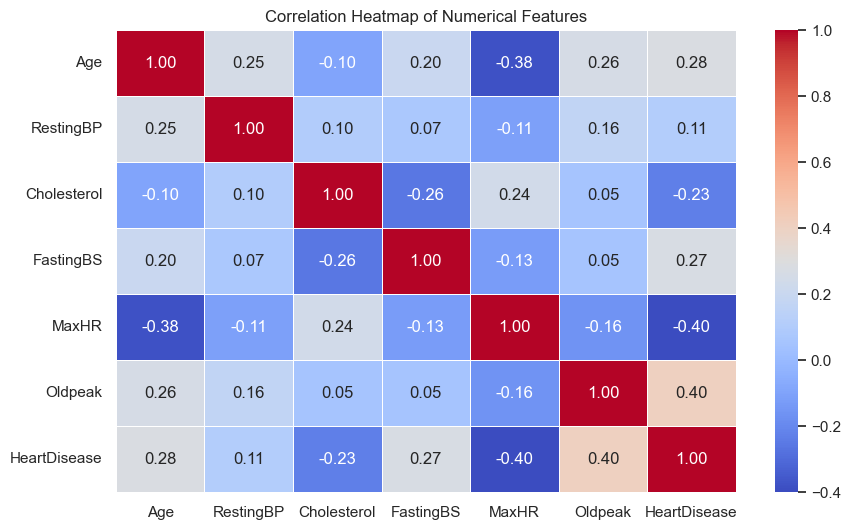

In [25]:
# Multivariate Analysis
# Correlation Heatmap for numerical vs numerical columns
plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)   # only numerical columns
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [38]:
# Check for presence of Outliers in Numerical columns

# to identify the presence of outliers, check the skewness value for each numerical column 
data.skew(numeric_only=True)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

| Feature          | Skewness | Skew Type               | Action Needed?                       |
| ---------------- | -------- | ----------------------- | ------------------------------------ |
| **Age**          | -0.1959  | Mildly left-skewed      | ❌ No action needed                   |
| **RestingBP**    | 0.1798   | Mildly right-skewed     | ❌ No action needed                   |
| **Cholesterol**  | -0.6101  | Moderately left-skewed  | ⚠️ Maybe                             |
| **FastingBS**    | 1.2645   | **Highly right-skewed** | ✅ Yes (Transform or leave if binary) |
| **MaxHR**        | -0.1444  | Mildly left-skewed      | ❌ No action needed                   |
| **Oldpeak**      | 1.0229   | **Highly right-skewed** | ✅ Yes (Transform)                    |
| **HeartDisease** | -0.2151  | Binary Target           | ❌ Ignore (target variable)           |


### Understanding the skewness

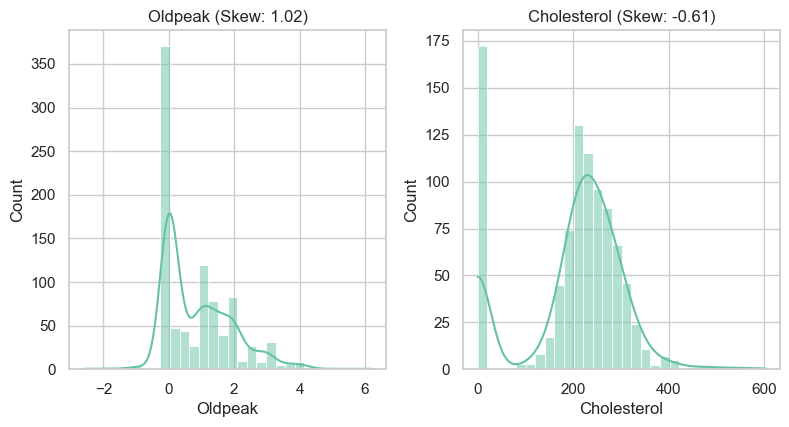

In [39]:
skewed_features = ['Oldpeak','Cholesterol']
plt.figure(figsize=(12, 8))
for i, col in enumerate(skewed_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"{col} (Skew: {data[col].skew():.2f})")
plt.tight_layout()
plt.show();

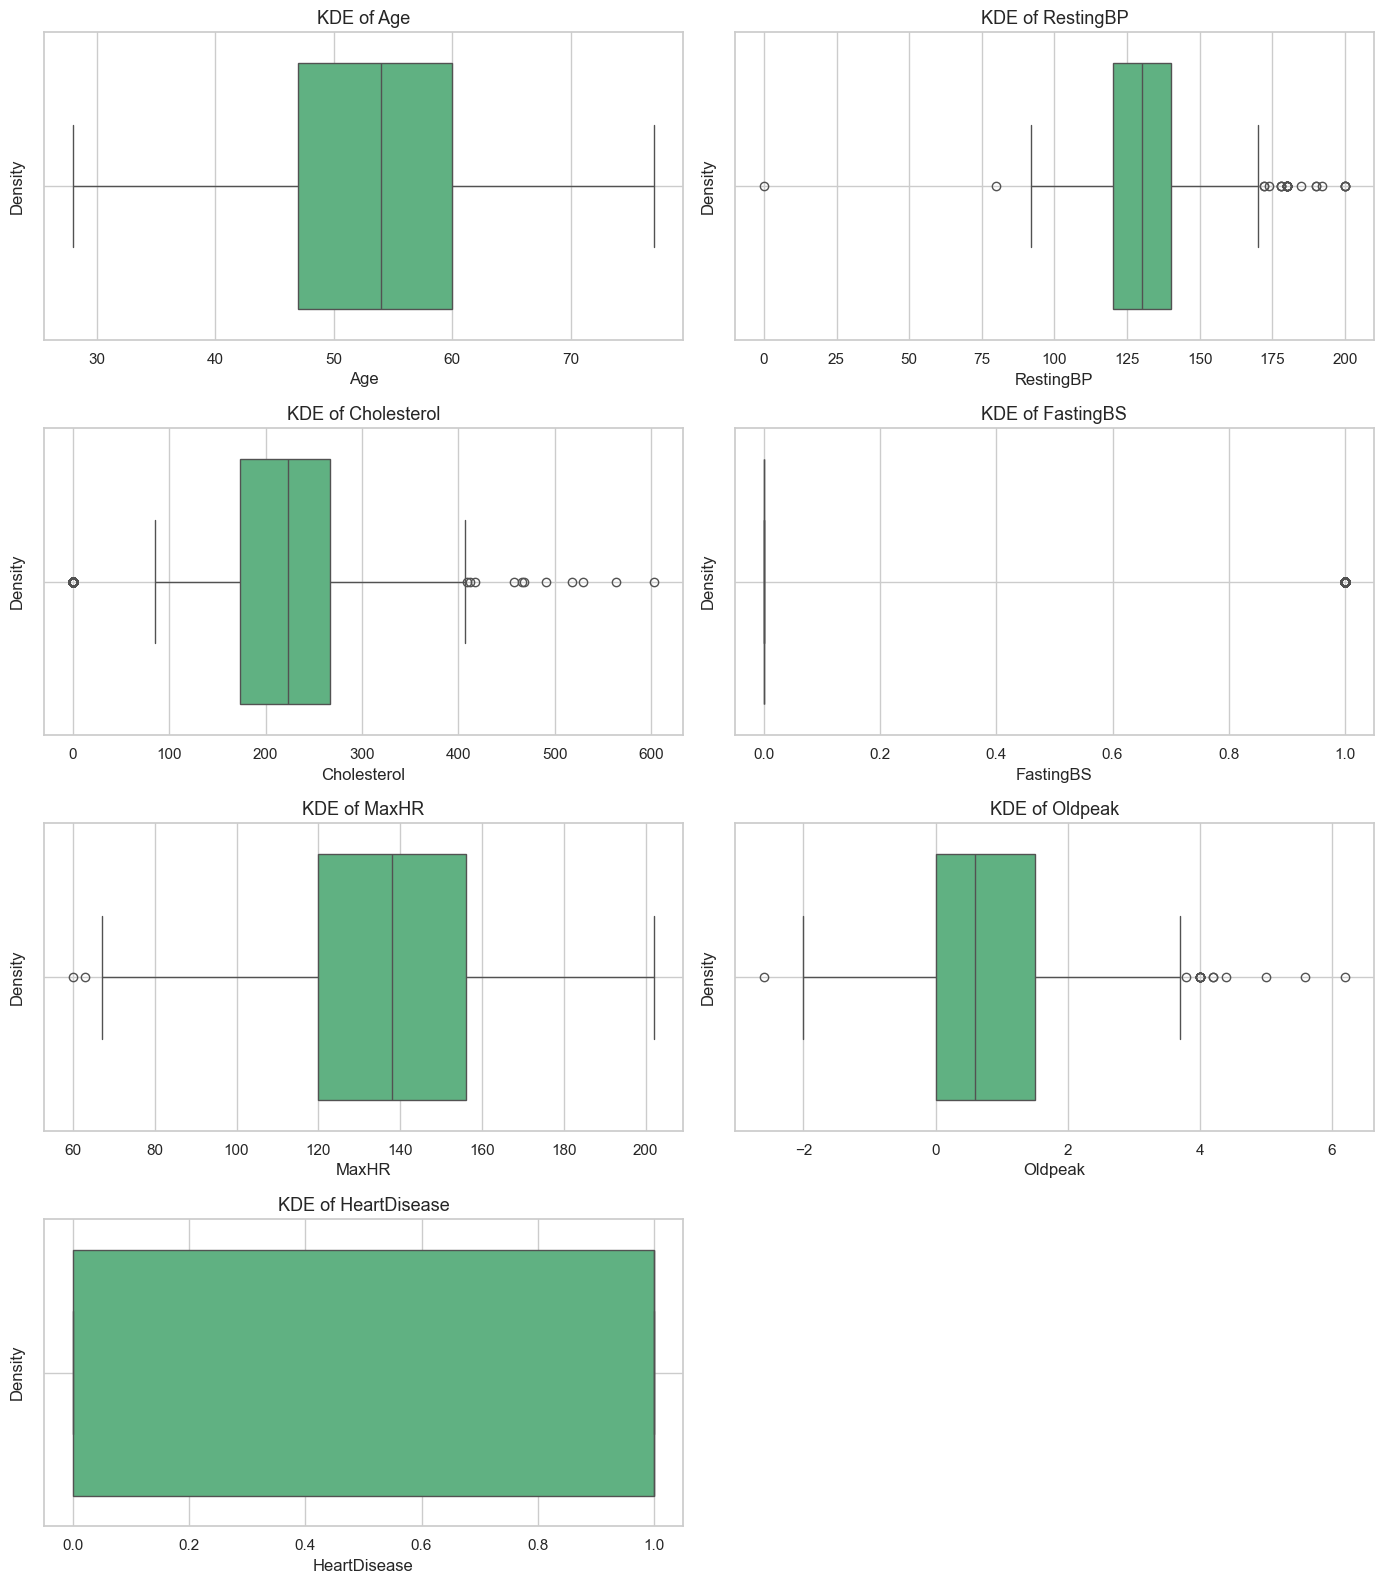

In [41]:
# numerical_cols = data.select_dtypes(include='number').columns

# n_cols = 2
# n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# plt.figure(figsize=(14, n_rows * 4))

# for i, col in enumerate(numerical_cols, 1):
#     plt.subplot(n_rows, n_cols, i)
#     sns.boxplot(x =data[col],  color='#52be80')
#     plt.title(f"KDE of {col}", fontsize=13)
#     plt.xlabel(col)
#     plt.ylabel("Density")
#     plt.grid(True)

# plt.tight_layout()
# plt.show();

In [51]:
# Two approaches to get the outliers in the data
# IQR method
# Standard deviation method

In [52]:
# 1. Get the Outlier rows based on IQR method
q1,q2,q3 = data['Cholesterol'].quantile(q=[0.25,0.5,0.75])
iqr = q3-q1
ub= q3+1.5*iqr
lb = q1-1.5*iqr

In [53]:
q1,q2,q3,iqr,ub,lb

(173.25, 223.0, 267.0, 93.75, 407.625, 32.625)

In [54]:
# Extract the outlier rows using ub & lb 

data[(data.Cholesterol<lb) | (data.Cholesterol>ub)].shape

data[(data.Cholesterol<lb) | (data.Cholesterol>ub)]

(183, 12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [66]:
round((data[(data.Cholesterol<lb) | (data.Cholesterol>ub)].shape[0]/len(data))*100,2)

19.93

In [391]:
# Observation:
# 19.93% of observations are identified as outliers based on IQR method

In [56]:
# 2. Get the Outlier rows based on Std Dev method
mu = data.Cholesterol.mean() 
sd = data.Cholesterol.std() 
UL = mu+2*sd 
LL = mu-2*sd 
print(mu, sd, UL, LL, sep = "\n")

198.7995642701525
109.38414455220337
417.56785337455926
-19.968724834254232


In [59]:
# Extract the outlier rows using ub & lb 

data[(data.Cholesterol<LL) | (data.Cholesterol>UL)].shape

data[(data.Cholesterol<LL) | (data.Cholesterol>UL)].head() 

(8, 12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1


In [60]:
round((data[(data.Cholesterol<LL) | (data.Cholesterol>UL)].shape[0]/len(data))*100,2)

0.87

In [61]:
# Observation:
# 0.87% of observations are identified as outliers based on std dev method

In [67]:
# IQR method
filtered_iqr = data[(data.Cholesterol > lb) & (data.Cholesterol < ub)]
print(filtered_iqr["Cholesterol"].skew())

# Std Dev method
filtered_std = data[(data.Cholesterol > LL) & (data.Cholesterol < UL)]
print(filtered_std["Cholesterol"].skew())

0.28885218604194296
-0.8497344974459423


In [49]:
# # Exclude: IQR based approach 
# data[data.Cholesterol < ub]["Cholesterol"].skew() 

# # Exclude: Std Dev based approach 
# data[data.Cholesterol < UL]["Cholesterol"].skew()


-0.8748827399484822

-0.8497344974459423

#### Using standard deviation based approach to remove skewness because dropping only very few data points.

In [68]:
df1 = data[(data.Cholesterol > LL) & (data.Cholesterol < UL)].reset_index(drop=True)

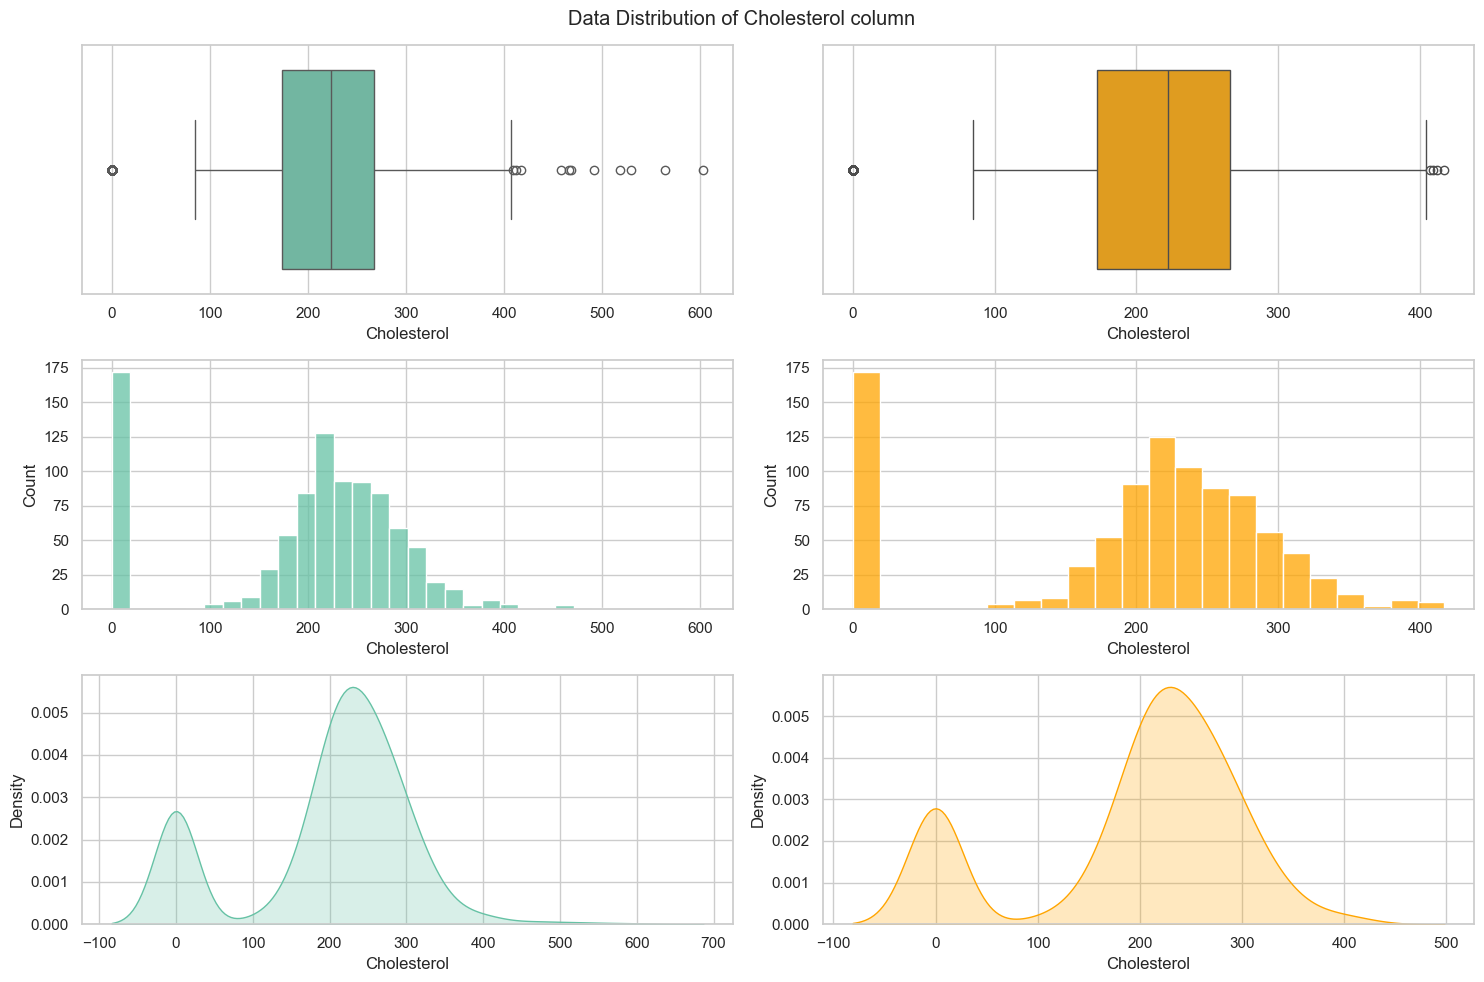

In [70]:
# Three imporant visualizations to understand data distribution and presence of outliers 

plt.figure(figsize=(15,10))
plt.suptitle("Data Distribution of Cholesterol column")

# ---With outliers---
# 1. Box plot 
plt.subplot(321)
sns.boxplot(data=data, x = "Cholesterol")
#2. Histogram 
plt.subplot(323) 
sns.histplot(data=data, x = "Cholesterol")
#3. KDE plot 
plt.subplot(325)
sns.kdeplot(data=data, x = "Cholesterol", fill=True) 

# ---Without outliers---
# 1. Box plot 
plt.subplot(322)
sns.boxplot(data=df1, x = "Cholesterol", color = "orange")
#2. Histogram 
plt.subplot(324) 
sns.histplot(data=df1, x = "Cholesterol", color = "orange")
#3. KDE plot 
plt.subplot(326)
sns.kdeplot(data=df1, x = "Cholesterol", fill=True,  color = "orange")

plt.tight_layout()
plt.show();

In [71]:
data.skew(numeric_only=True)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [72]:
df1.skew(numeric_only=True)

Age            -0.193837
RestingBP       0.173653
Cholesterol    -0.849734
FastingBS       1.272790
MaxHR          -0.134451
Oldpeak         1.018335
HeartDisease   -0.212523
dtype: float64

In [73]:
mu = df1.FastingBS.mean() 
sd = df1.FastingBS.std() 
UL = mu+2*sd 
LL = mu-2*sd
print(mu, sd, UL, LL, sep = "\n")

0.23186813186813188
0.42225731102856656
1.076382753925265
-0.6126464901890012


In [77]:
df1[(df1.FastingBS<LL) | (df1.FastingBS>UL)].shape
df1[(df1.FastingBS<LL) | (df1.FastingBS>UL)].head() 

(0, 12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [400]:
# def cap_outliers(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     df[col] = df[col].clip(lower, upper)
#     return df

In [401]:
# df = cap_outliers(df1, 'Oldpeak')
# df = cap_outliers(df1, 'Cholesterol')
# df = cap_outliers(df1,'RestingBP')

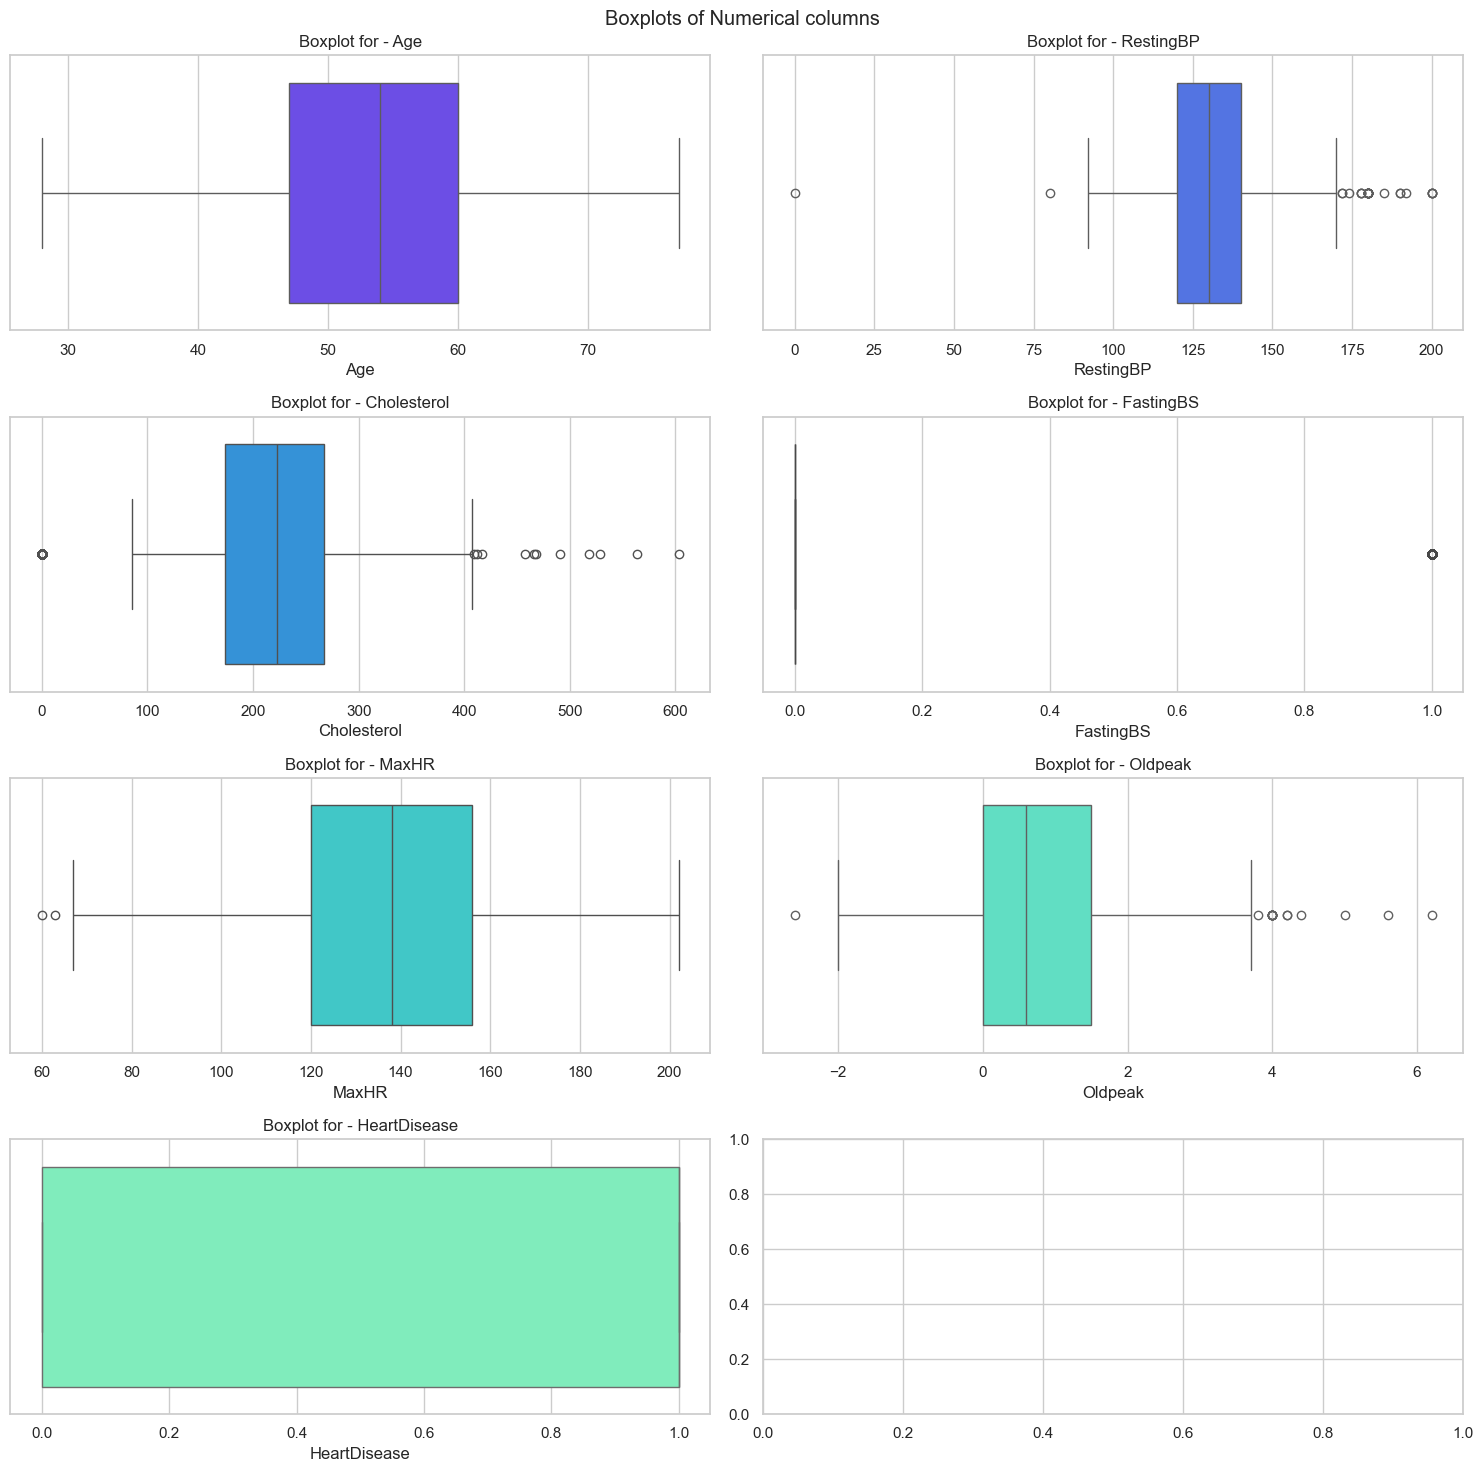

In [78]:
num_cols = data.select_dtypes(include="number").columns
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (15,15))
pos = axs.flatten() 

for i in range(len(num_cols)): 
    sns.boxplot(data=data, x = num_cols[i], ax = pos[i], color=sns.color_palette("rainbow", 14)[i])
    pos[i].set_title(f"Boxplot for - {num_cols[i]}")

plt.suptitle("Boxplots of Numerical columns")
plt.tight_layout()
plt.show();

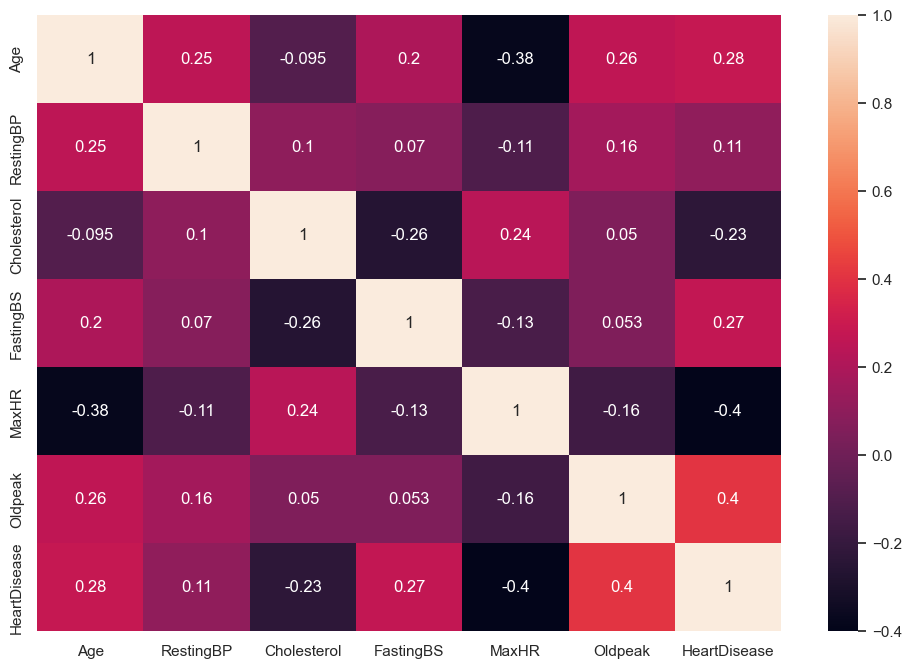

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show();

In [80]:
# Splitting the dataset into X(Feature Variable) and Y(Class Variable)
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [81]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [82]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [83]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [84]:
# Apply preprocessing

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [85]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((734, 11), (184, 11), (734,), (184,))

In [86]:
# Binary columns
binary_cols = ['Sex', 'ExerciseAngina']

X_train[binary_cols] = X_train[binary_cols].replace({'M': 1, 'F': 0, 'Y': 1, 'N': 0})
X_test[binary_cols] = X_test[binary_cols].replace({'M': 1, 'F': 0, 'Y': 1, 'N': 0})


In [87]:
onehot_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[onehot_cols])

X_train_ohe = pd.DataFrame(ohe.transform(X_train[onehot_cols]), 
                           columns=ohe.get_feature_names_out(onehot_cols),
                           index=X_train.index)
X_test_ohe = pd.DataFrame(ohe.transform(X_test[onehot_cols]), 
                          columns=ohe.get_feature_names_out(onehot_cols),
                          index=X_test.index)


OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [88]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
X_train_final = pd.concat([X_train[numeric_cols + binary_cols], X_train_ohe], axis=1)
X_test_final = pd.concat([X_test[numeric_cols + binary_cols], X_test_ohe], axis=1)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)


In [90]:
from collections import Counter
Counter(y_train) # Imbalanced Dataset

Counter({1: 406, 0: 328})

In [91]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_bsm,y_train_bsm=smote.fit_resample(X_train_scaled,y_train)

In [92]:
from collections import Counter
Counter(y_train_bsm) # balanced Dataset

Counter({1: 406, 0: 406})

In [93]:
np.sqrt((X_train_bsm.shape[0]/3)*2)

23.266571155486865

In [95]:
def objective(trial):
    # Suggest hyperparameters
    k = trial.suggest_int('k', 20, 40)
    w = trial.suggest_categorical('w', ['uniform', 'distance'])
    algo = trial.suggest_categorical('algo', ['ball_tree', 'kd_tree'])

    # Define model
    knn = KNeighborsClassifier(n_neighbors=k, weights=w,algorithm=algo)

    # Perform cross-validation
    values = cross_validate(knn, X_train_bsm, y_train_bsm, cv=3, scoring='accuracy', return_train_score=True)
    cv_acc = values['test_score'].mean()
    train_acc = values['train_score'].mean()

    # Set additional trial attributes
    trial.set_user_attr('train_acc', train_acc)
    trial.set_user_attr('algorithm', algo)

    return cv_acc


In [493]:
# space = {
#     "k": range(20, 40), 
#     "w": ["uniform", "distance"],
# }

In [97]:
study=optuna.create_study(direction="maximize")

[I 2025-08-30 11:57:48,364] A new study created in memory with name: no-name-b41c60fb-e3e8-4475-a00d-109e5190d497


In [98]:
study.optimize(objective,n_trials=50)

[I 2025-08-30 11:57:49,112] Trial 0 finished with value: 0.8706664844426223 and parameters: {'k': 29, 'w': 'distance', 'algo': 'ball_tree'}. Best is trial 0 with value: 0.8706664844426223.
[I 2025-08-30 11:57:49,161] Trial 1 finished with value: 0.8755910892442258 and parameters: {'k': 27, 'w': 'distance', 'algo': 'kd_tree'}. Best is trial 1 with value: 0.8755910892442258.
[I 2025-08-30 11:57:49,209] Trial 2 finished with value: 0.8731310646439798 and parameters: {'k': 25, 'w': 'distance', 'algo': 'ball_tree'}. Best is trial 1 with value: 0.8755910892442258.
[I 2025-08-30 11:57:49,249] Trial 3 finished with value: 0.8706710400437337 and parameters: {'k': 28, 'w': 'distance', 'algo': 'kd_tree'}. Best is trial 1 with value: 0.8755910892442258.
[I 2025-08-30 11:57:49,315] Trial 4 finished with value: 0.8755819780420026 and parameters: {'k': 35, 'w': 'distance', 'algo': 'kd_tree'}. Best is trial 1 with value: 0.8755910892442258.
[I 2025-08-30 11:57:49,449] Trial 5 finished with value: 0.86

In [99]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_algo,params_k,params_w,user_attrs_algorithm,user_attrs_train_acc,state
0,0,0.870666,2025-08-30 11:57:49.056451,2025-08-30 11:57:49.112878,0 days 00:00:00.056427,ball_tree,29,distance,ball_tree,1.000000,COMPLETE
1,1,0.875591,2025-08-30 11:57:49.113867,2025-08-30 11:57:49.161939,0 days 00:00:00.048072,kd_tree,27,distance,kd_tree,1.000000,COMPLETE
2,2,0.873131,2025-08-30 11:57:49.161939,2025-08-30 11:57:49.209910,0 days 00:00:00.047971,ball_tree,25,distance,ball_tree,1.000000,COMPLETE
3,3,0.870671,2025-08-30 11:57:49.210910,2025-08-30 11:57:49.249982,0 days 00:00:00.039072,kd_tree,28,distance,kd_tree,1.000000,COMPLETE
4,4,0.875582,2025-08-30 11:57:49.262211,2025-08-30 11:57:49.315053,0 days 00:00:00.052842,kd_tree,35,distance,kd_tree,1.000000,COMPLETE
5,5,0.863268,2025-08-30 11:57:49.315053,2025-08-30 11:57:49.449292,0 days 00:00:00.134239,kd_tree,24,uniform,kd_tree,0.866373,COMPLETE
6,6,0.870662,2025-08-30 11:57:49.450292,2025-08-30 11:57:49.499341,0 days 00:00:00.049049,ball_tree,37,distance,ball_tree,1.000000,COMPLETE
7,7,0.869432,2025-08-30 11:57:49.500344,2025-08-30 11:57:49.551933,0 days 00:00:00.051589,kd_tree,33,distance,kd_tree,1.000000,COMPLETE
8,8,0.869432,2025-08-30 11:57:49.551933,2025-08-30 11:57:49.599995,0 days 00:00:00.048062,ball_tree,33,distance,ball_tree,1.000000,COMPLETE
9,9,0.875591,2025-08-30 11:57:49.599995,2025-08-30 11:57:49.644587,0 days 00:00:00.044592,ball_tree,27,distance,ball_tree,1.000000,COMPLETE


In [100]:
study.best_trial

FrozenTrial(number=1, state=1, values=[0.8755910892442258], datetime_start=datetime.datetime(2025, 8, 30, 11, 57, 49, 113867), datetime_complete=datetime.datetime(2025, 8, 30, 11, 57, 49, 161939), params={'k': 27, 'w': 'distance', 'algo': 'kd_tree'}, user_attrs={'train_acc': 1.0, 'algorithm': 'kd_tree'}, system_attrs={}, intermediate_values={}, distributions={'k': IntDistribution(high=40, log=False, low=20, step=1), 'w': CategoricalDistribution(choices=('uniform', 'distance')), 'algo': CategoricalDistribution(choices=('ball_tree', 'kd_tree'))}, trial_id=1, value=None)

In [101]:
best = study.best_trial

print("Best Accuracy Score:", best.value)
print("Best Hyperparameters:", best.params)
print("Training Accuracy:", best.user_attrs['train_acc'])
print("Trial Number:", best.number)


Best Accuracy Score: 0.8755910892442258
Best Hyperparameters: {'k': 27, 'w': 'distance', 'algo': 'kd_tree'}
Training Accuracy: 1.0
Trial Number: 1


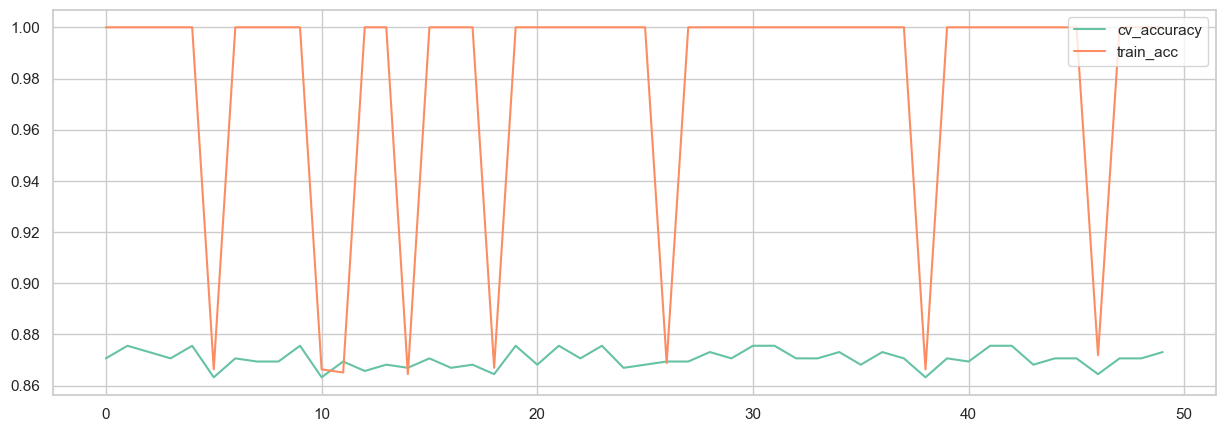

In [102]:
plt.figure(figsize=(15,5))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"],label="cv_accuracy")
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_acc"],label="train_acc")
plt.legend(loc='upper right')
plt.show();

In [103]:
study.best_value

0.8755910892442258

In [104]:
study.best_params

{'k': 27, 'w': 'distance', 'algo': 'kd_tree'}

In [105]:
knn=KNeighborsClassifier(n_neighbors=27,algorithm="kd_tree",weights="distance")

In [106]:
model = knn.fit(X_train_bsm, y_train_bsm)

In [107]:
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.9239130434782609


In [109]:
knn = KNeighborsClassifier(n_neighbors=27,algorithm="kd_tree",weights="distance")
cv_results = cross_validate(knn, X_train_bsm, y_train_bsm, cv=3, scoring='accuracy', return_train_score=True)
print("Training Accuracy Scores:", cv_results['train_score'])
print("Validation (CV) Accuracy Scores:", cv_results['test_score'])
print("Mean Training Accuracy:", cv_results['train_score'].mean())
print("Mean Validation Accuracy:", cv_results['test_score'].mean())

Training Accuracy Scores: [1. 1. 1.]
Validation (CV) Accuracy Scores: [0.900369   0.87084871 0.85555556]
Mean Training Accuracy: 1.0
Mean Validation Accuracy: 0.8755910892442258


In [110]:
confusion_matrix(y_test,y_pred)

array([[76,  6],
       [ 8, 94]], dtype=int64)

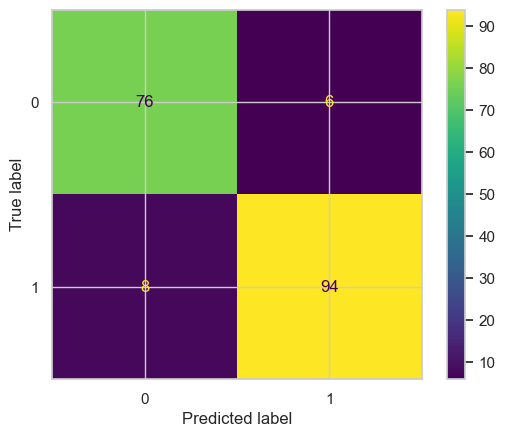

In [115]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm.plot()
plt.show();

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        82
           1       0.94      0.92      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

